# Training and testing a model to determine real vs. fake headlines

Reference: https://www.datacamp.com/community/tutorials/scikit-learn-fake-news
; https://s3.amazonaws.com/assets.datacamp.com/production/course_5064/slides/chapter4.pdf

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip

# Read in dataset(s)

In [13]:
test_df = pd.DataFrame(pd.read_csv('../00_Resources/fake_or_real_news.csv'))
test_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
with open('../00_Resources/true_fake.csv', 'rb') as fd:
    gzip_fd = gzip.GzipFile(fileobj=fd)
    df = pd.read_csv(gzip_fd)
df = df.drop(columns={'Unnamed: 0'})
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,category
0,House Freedom Caucus chief calls for U.S. tax ...,WASHINGTON (Reuters) - Members of the House Fr...,politicsNews,"June 9, 2017",True
1,NEVER TRUMP: Ice Cream Shop Kicks Out Muslim-...,"An ice cream parlor in Orange County, Californ...",News,"May 26, 2016",False
2,Afghan Taliban deny former hostage's claims of...,"PESHAWAR, Pakistan (Reuters) - A Taliban spoke...",worldnews,"October 15, 2017",True
3,Senate backs massive increase in military spen...,WASHINGTON (Reuters) - The U.S. Senate passed ...,politicsNews,"September 18, 2017",True
4,OBAMA’S DOJ LET Russian Lawyer Into U.S. WITHO...,"In July of 2016, Donald Trump, Jr. met a 42-ye...",politics,"Jul 13, 2017",False
...,...,...,...,...,...
44893,KELLYANNE CONWAY Slaps Down Rabid CNN Host Chr...,Chris Cuomo of fake news network CNN interview...,left-news,"Jul 10, 2017",False
44894,North Carolina transgender bathroom law faces ...,"WINSTON-SALEM, N.C. (Reuters) - Transgender pe...",politicsNews,"March 28, 2016",True
44895,Turkey feels betrayed over EU accession but st...,LONDON (Reuters) - Turkey feels betrayed by so...,worldnews,"September 14, 2017",True
44896,LEFTY STUNT BACKFIRES: Inflatable “Trump Chick...,It s so funny that a lefty effort to harm Pres...,left-news,"Aug 10, 2017",False


In [15]:
df['category'].value_counts(normalize=True)

False    0.522985
True     0.477015
Name: category, dtype: float64

# Set X and y and split

In [16]:
# ML libraries
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
# TODO: find out how to CountVectorize a multi-dimensional array.

X = df['text']
y = df['category']

In [18]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X.shape, y.shape)

(44898,) (44898,)


In [21]:
# This cell is a test 
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)


count_test

<14817x103173 sparse matrix of type '<class 'numpy.int64'>'
	with 2260922 stored elements in Compressed Sparse Row format>

# CountVectorizer and TfidfVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [24]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['zzpx_bzka40police', 'zzqvyk8xif', 'zzsg90pbf6', 'zztaine', 'zzucqevt3m', 'zzuml4hkoc', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré']
['00', '000', '0000', '00004', '000048', '000063', '00007', '000270', '00042', '0009']


In [25]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [26]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [27]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

{'said'}

In [28]:
print(count_df.equals(tfidf_df))

False


In [29]:
count_df

,00,000,0000,00004,000048,000063,00007,000270,00042,0009,...,zzpx_bzka40police,zzqvyk8xif,zzsg90pbf6,zztaine,zzucqevt3m,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzz,zzzzzzzzzzzzz,émigré
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30076,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30077,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_df.to_csv('../Resources/count_df.csv')

# Test/train SVM

In [52]:
from sklearn.svm import SVC
# Create a support vector machine linear classifer and fit it to the training data
model = SVC(kernel='linear')
model.fit(tfidf_train, y_train)

SVC(kernel='linear')

In [53]:
# Print the model score using the test data
model.score(tfidf_test, y_test)

0.948505095498414

In [54]:
# Calculate the classification report
from sklearn.metrics import classification_report
preds = model.predict(tfidf_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95      7691
        True       0.94      0.96      0.95      7126

    accuracy                           0.95     14817
   macro avg       0.95      0.95      0.95     14817
weighted avg       0.95      0.95      0.95     14817



In [55]:
from sklearn.svm import SVC
# Create a support vector machine linear classifer and fit it to the training data
model = SVC(kernel='linear')
model.fit(count_train, y_train)

SVC(kernel='linear')

In [56]:
# Print the model score using the test data
model.score(count_test, y_test)

0.9459404737801175

In [57]:
# Calculate the classification report
from sklearn.metrics import classification_report
preds = model.predict(count_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95      7691
        True       0.94      0.95      0.94      7126

    accuracy                           0.95     14817
   macro avg       0.95      0.95      0.95     14817
weighted avg       0.95      0.95      0.95     14817



In [58]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [59]:
# Create the SVC Model
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn import set_config
set_config(display="diagram")

pipe = make_pipeline(model)
pipe

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [60]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'kernal': 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’,'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(pipe, param_grid, verbose=3)

In [61]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(tfidf_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.948, total=  50.9s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.9s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.942, total=  40.2s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.943, total=  40.0s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.947, total=  40.6s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.938, total=  40.2s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.948, total=  49.8s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.942, total=  40.0s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.943, total=  40.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.947, total=  40.0s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] .

[CV] ........ svc__C=50, svc__gamma=0.0001, score=0.930, total=  52.0s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0001, score=0.927, total=  51.8s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0001, score=0.926, total=  51.8s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0001, score=0.926, total=  52.0s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0001, score=0.924, total=  49.6s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0005, score=0.930, total=  53.0s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0005, score=0.927, total=  52.0s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 69.7min finished


GridSearchCV(estimator=Pipeline(steps=[('svc', SVC(kernel='linear'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [62]:
# List the best parameters for this dataset
print(f"Best params: {grid.best_params_}")
# List the best score
print(f"Best score: {grid.best_score_}")

Best params: {'svc__C': 1, 'svc__gamma': 0.0001}
Best score: 0.9435522612792123


In [63]:
grid.best_estimator_

Pipeline(steps=[('svc', SVC(C=1, gamma=0.0001, kernel='linear'))])

In [65]:
# Make predictions with the hypertuned model
predictions = grid.predict(tfidf_test)

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names = ["False", "True"]))

              precision    recall  f1-score   support

       False       0.96      0.94      0.95      7691
        True       0.94      0.96      0.95      7126

    accuracy                           0.95     14817
   macro avg       0.95      0.95      0.95     14817
weighted avg       0.95      0.95      0.95     14817



# Check out a few other model types

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.938


In [77]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.91132
Alpha: 0.10 Score: 0.93285
Alpha: 0.20 Score: 0.93487
Alpha: 0.30 Score: 0.93528
Alpha: 0.40 Score: 0.93501
Alpha: 0.50 Score: 0.93453
Alpha: 0.60 Score: 0.93460
Alpha: 0.70 Score: 0.93420
Alpha: 0.80 Score: 0.93386
Alpha: 0.90 Score: 0.93359


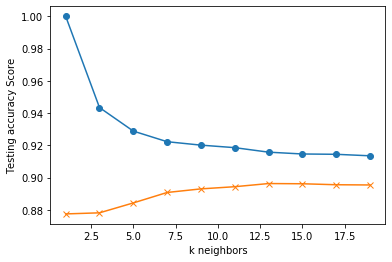

In [20]:
# Fit KNN model with tfidf and chart results
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(tfidf_train, y_train)
    train_score = model.score(tfidf_train, y_train)
    test_score = model.score(tfidf_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

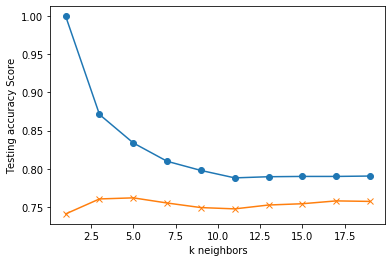

In [22]:
# Fit KNN model with count_vectorizer and chart results
# MUCH worse
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(count_train, y_train)
    train_score = model.score(count_train, y_train)
    test_score = model.score(count_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

# Most important features in classification

In [86]:
feature_names = tfidf_vectorizer.get_feature_names()

# Print the "most real" words
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:10]

[(-4.824434878891475, 'trump'),
 (-4.9664158215827445, 'says'),
 (-5.463495922186102, 'house'),
 (-5.805418006096416, 'russia'),
 (-5.846399288968043, 'north'),
 (-5.854134233547253, 'korea'),
 (-5.960795551602371, 'senate'),
 (-5.990360728482187, 'white'),
 (-6.014562240980712, 'china'),
 (-6.053748931513532, 'new')]

In [83]:
def most_informative_feature(vectorizer, classifier, n=100):
    """
    A function to print the most 'informative' words associated with fake and real news for binary classification.
    """
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
    print('---------------------------------')
    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature(tfidf_vectorizer, linear_clf, n=30)

False -18.501315869574526 video
False -10.183033272142875 breaking
False -8.962783978277576 watch
False -8.695845982465602 racist
False -8.580605081204615 gop
False -7.958337354506038 just
False -7.615314532855993 hillary
False -7.612686163621778 molester
False -7.444991607397199 lied
False -7.132858458564095 joe
False -6.944876361052446 ck
False -6.80641834535091 dem
False -6.709122419175899 destroy
False -6.532911288921217 dumpster
False -6.4579459280415525 dems
False -6.337858502455757 begs
False -6.181717725218552 anonymous
False -6.115966363738506 wow
False -5.9842729083546065 images
False -5.925074557934142 james
False -5.872618046718923 illegals
False -5.807002449528325 lol
False -5.768693183974716 creative
False -5.7635075950422126 sharia
False -5.637259040804631 boiler
False -5.636065224425532 racism
False -5.634786524828486 bernie
False -5.600816961010544 kkk
False -5.569728780953048 ammo
False -5.532800040888096 caroline
-------------------------
True 7.4910269381597265 fact

# Save model/pipeline

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# A pipeline for the headine model
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
model = SVC(C=1.0, kernel='linear', gamma=0.0001)
svc_pipeline = make_pipeline(vectorizer, model)

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('svc', SVC(gamma=0.0001, kernel='linear'))])

In [21]:
svc_pipeline.score(X_test, y_test)

NameError: name 'pipeline' is not defined

In [ ]:
# save model using joblib
# import joblib
# filename = '../05_Models/fake_title_SVM_model.sav'
# joblib.dump(svc_pipeline, filename)

In [32]:
# A pipeline for the text model
# Hmmm...
# This seems wayyyy to accurate...
# Overfitting (whatever that means)?

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# Set X and y
X = df['text']
y = df['category']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X.shape, y.shape)

# A pipeline for the text model
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
model = SVC(C=1.0, kernel='linear', gamma=0.0001)
pipeline = make_pipeline(vectorizer, model)

# Fit vectorizer and model
pipeline.fit(X_train, y_train)

# Print model score
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

(44898,) (44898,)
0.9984260386659936
0.9940311804008909


In [31]:
# save model using joblib
import joblib
filename = '../05_Models/fake_body_SVM_model.sav'
joblib.dump(pipeline, filename)

['../05_Models/fake_body_SVM_model.sav']

In [19]:
import joblib
# Load model from disk
loaded_pipeline = joblib.load('../05_Models/fake_body_SVM_model.sav')
loaded_pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('svc', SVC(gamma=0.0001, kernel='linear'))])

In [20]:
print(loaded_pipeline.score(X_train, y_train))
print(loaded_pipeline.score(X_test, y_test))

0.996908347461853
0.9969629479651752
